20.0 1350.0 1.11568691774e-06
27.2246899865 1263.75386655 8.96786476068e-06
37.0591872429 1200.39510398 5.91380780959e-05
50.446244192 1153.85002846 0.000319946091548
68.6691679554 1119.65674616 0.00142009650483
93.4748404607 1094.53742812 0.00517118832706
127.241177654 1076.0840918 0.0154487838521
173.205080757 1062.5277675 0.0378642785115
235.772731384 1052.56892182 0.0761371334278
320.94197596 1045.2528821 0.125601493558
436.877289958 1039.87831972 0.169990453496
594.692439061 1035.93001957 0.188749455659
809.515864537 1033.02949057 0.171940557172
1101.94092256 1030.89868283 0.128499784167
1500.0 1029.33333333 0.0787876076027


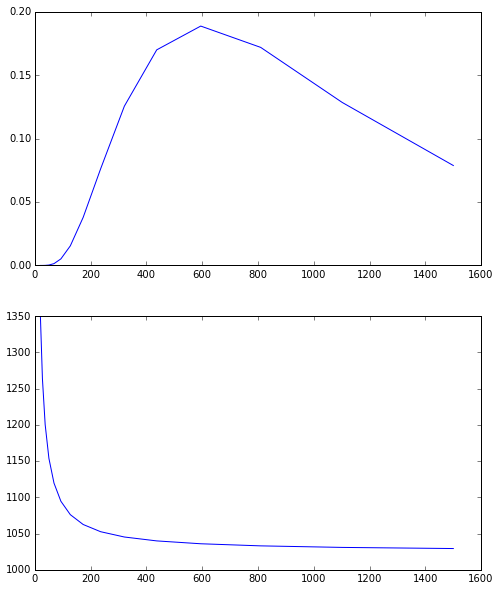

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Dp = 4.
rhow = 1025.
rhos = 2650.
nf = 2.
nd = 15
D = np.logspace(np.log10(20.),np.log10(1500.),nd)
# density from fractal dimension
rhof = rhow + (rhos-rhow)*(D/Dp)**(nf-3.)
# log-normal distribution
mu = np.log10(600.)
sigma = np.log10(2.)
fr = 1./(np.sqrt(2.*np.pi*sigma**2))*np.exp(-(np.log10(D)-mu)**2/(2.*sigma**2))
fr = fr/(np.sum(fr))

    # print t, np.sum(frt), frt

for i in np.arange(len(D)):
    print D[i],rhof[i],fr[i]

fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(D,fr)
plt.subplot(2,1,2)
plt.plot(D,rhof)
plt.show()

[ 1030.          1075.71428571  1121.42857143  1167.14285714  1212.85714286
  1258.57142857  1304.28571429  1350.        ]
[ 1025.  1030.  1050.  1080.  1240.  1300.  1500.  2700.]
defloc_t0.0.png
Sum of frac:  1.0
[   5.00545915    6.51639236    8.78691638   12.19889998   17.32618865
   25.03111698   36.60954067   54.00878039   80.15513254  119.44602924
  178.48962179  267.21617463  400.54818982  600.91015256  902.        ]
[ 1027.5  1037.5  1052.5  1132.5  1162.5  1262.5  1862.5]
(15L, 7L) (15L, 7L) (15L, 7L)


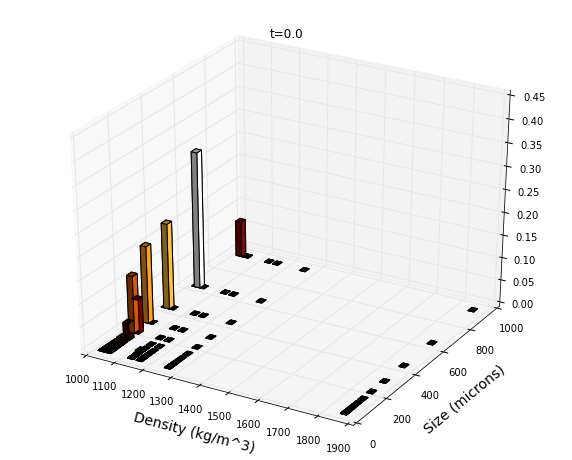

In [19]:
nDbins = 15
nrbins = 7
Dbinlims = np.logspace(np.log10(4.),np.log10(1800.),nDbins+1)
rbinlims = np.linspace(1030.,1350.,nrbins+1)
print rbinlims
rbinlims = np.array((1025.,1030.,1050.,1080.,1240.,1300.,1500.,2700.))
print rbinlims
# print Dbinlims

# de-floc distribution
frd = np.zeros_like(fr)
frd[0:5]=(.1, .2, .4, .2, .1)
t = .0
fn = "defloc_t{0}.png".format(100.*t)
print fn
frt = fr+t*(frd-fr)

frac = np.zeros( (nDbins,nrbins) )
for k in np.arange(len(D)):
    for i in np.arange(len(Dbinlims)-1):
        for j in np.arange(len(rbinlims)-1):
            if (D[k]>Dbinlims[i] and D[k]<=Dbinlims[i+1]) and (rhof[k]>rbinlims[j] and rhof[k]<=rbinlims[j+1]):
                #print k,i,j,D[k],rhof[k],frt[k],'rbinlims:',rbinlims[j],rbinlims[j+1]
                frac[i,j]=frac[i,j]+frt[k]
            
print 'Sum of frac: ',np.sum(frac)
frac = frac/np.sum(frac)

# plot histogram
Dbins = Dbinlims[0]+np.cumsum(0.5*np.diff(Dbinlims))
rbins = rbinlims[0]+np.cumsum(0.5*np.diff(rbinlims))
print Dbins
print rbins
x,y = np.meshgrid( rbins, Dbins )
print x.shape, y.shape, frac.shape
x = x.flatten()
y = y.flatten()
z = frac.flatten()

import matplotlib.cm as cm
import matplotlib.colors as colors

norm = colors.Normalize(frac.min(), frac.max())
colors = cm.afmhot(norm(z))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d( x, y, np.zeros(len(z)), 20, 30, z, color = colors)
plt.ylabel('Size (microns)',fontsize=14)
plt.xlabel('Density (kg/m^3)',fontsize=14)
plt.title('t={0}'.format(t))
ax.set_zlim([0.,.45])
#plt.zlabel('Fraction')
plt.savefig(fn)
plt.show()